* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [2]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
!pip install -U finance-datareader

Requirement already up-to-date: finance-datareader in /opt/anaconda3/lib/python3.7/site-packages (0.9.33)


In [3]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

* 다음의 형태가 되도록 만들어 주세요.

|    | 종목별           |
|---:|:-----------------|
|  1 | 삼성전자         |
|  2 | LG에너지솔루션   |
|  3 | SK하이닉스       |
|  4 | 삼성바이오로직스 |
|  5 | NAVER            |
|  6 | 삼성SDI          |
|  7 | 현대차           |
|  8 | LG화학           |
|  9 | 카카오           |
| 10 | 기아             |

In [4]:
url = "https://finance.naver.com/sise/entryJongmok.naver?&page=1"

print(url)

https://finance.naver.com/sise/entryJongmok.naver?&page=1


In [9]:
df = pd.read_html(url)
df = df[0].dropna()

top_table = df[["종목별"]]
top_table

## 전체 상장종목에서 종목코드와 종목명만 가져오기

* 아래의 형태가 되게 해주세요.
| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |

In [11]:
df_krx = fdr.StockListing("KRX")

In [13]:
df_krx = df_krx[['Name', 'Symbol']]

df_krx

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520
...,...,...
8013,흥국화재우,000545
8014,흥아해운,003280
8015,희림,037440
8016,히어로즈 단기채권ESG액티브,419890


## merge 를 통한 시가총액 상위 10개 종목 만들기

### merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>



* 아래의 형태가 되게 만들며, Name을 인덱스로 지정합니다.
| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |
| 삼성SDI          |   006400 |
| 현대차           |   005380 |
| LG화학           |   051910 |
| 카카오           |   035720 |
| 기아             |   000270 |


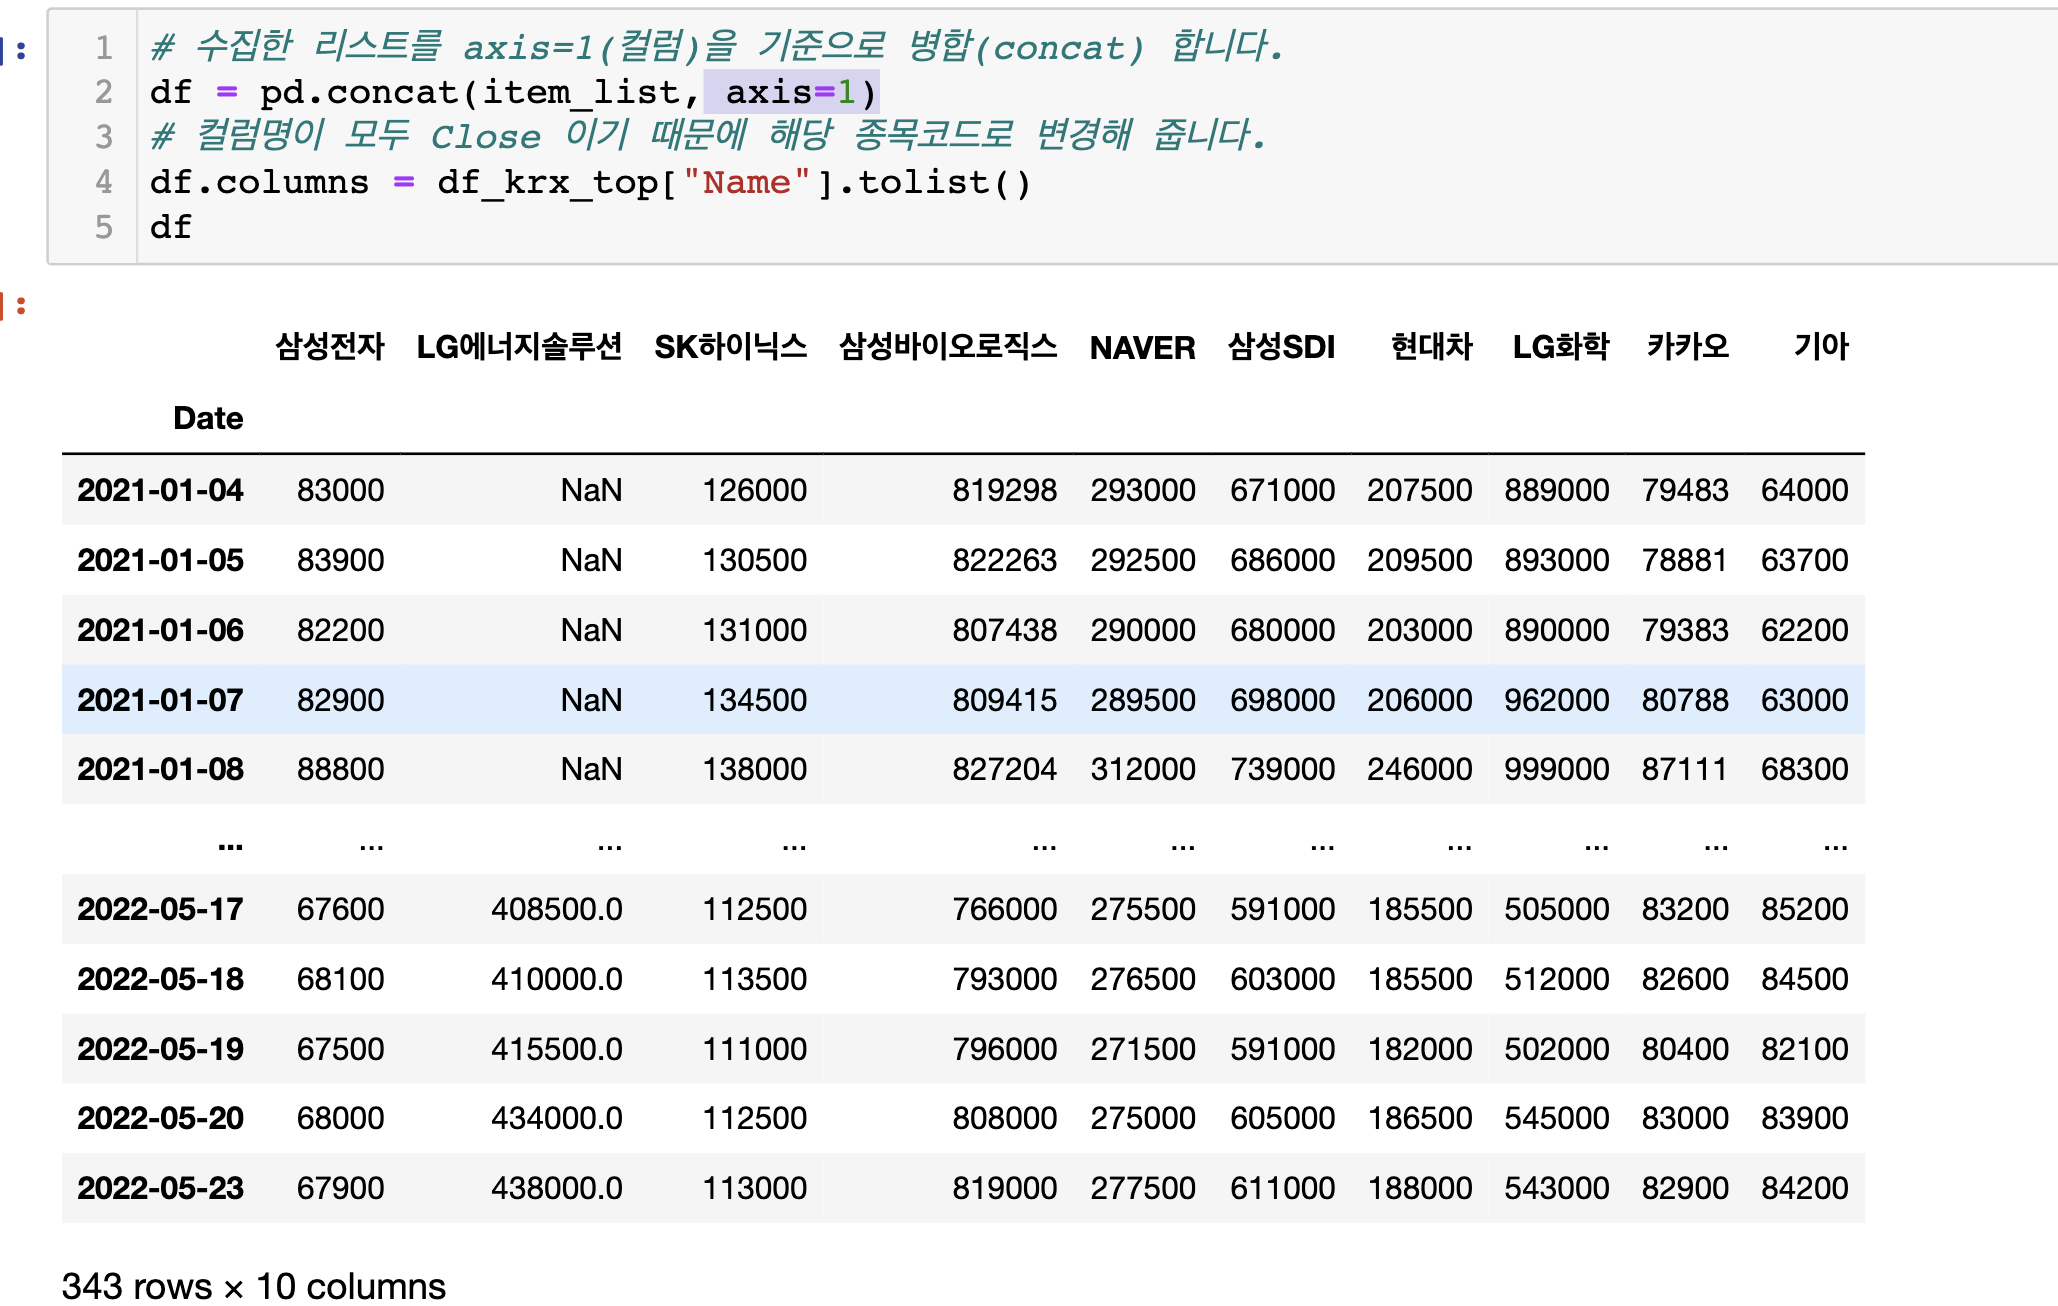

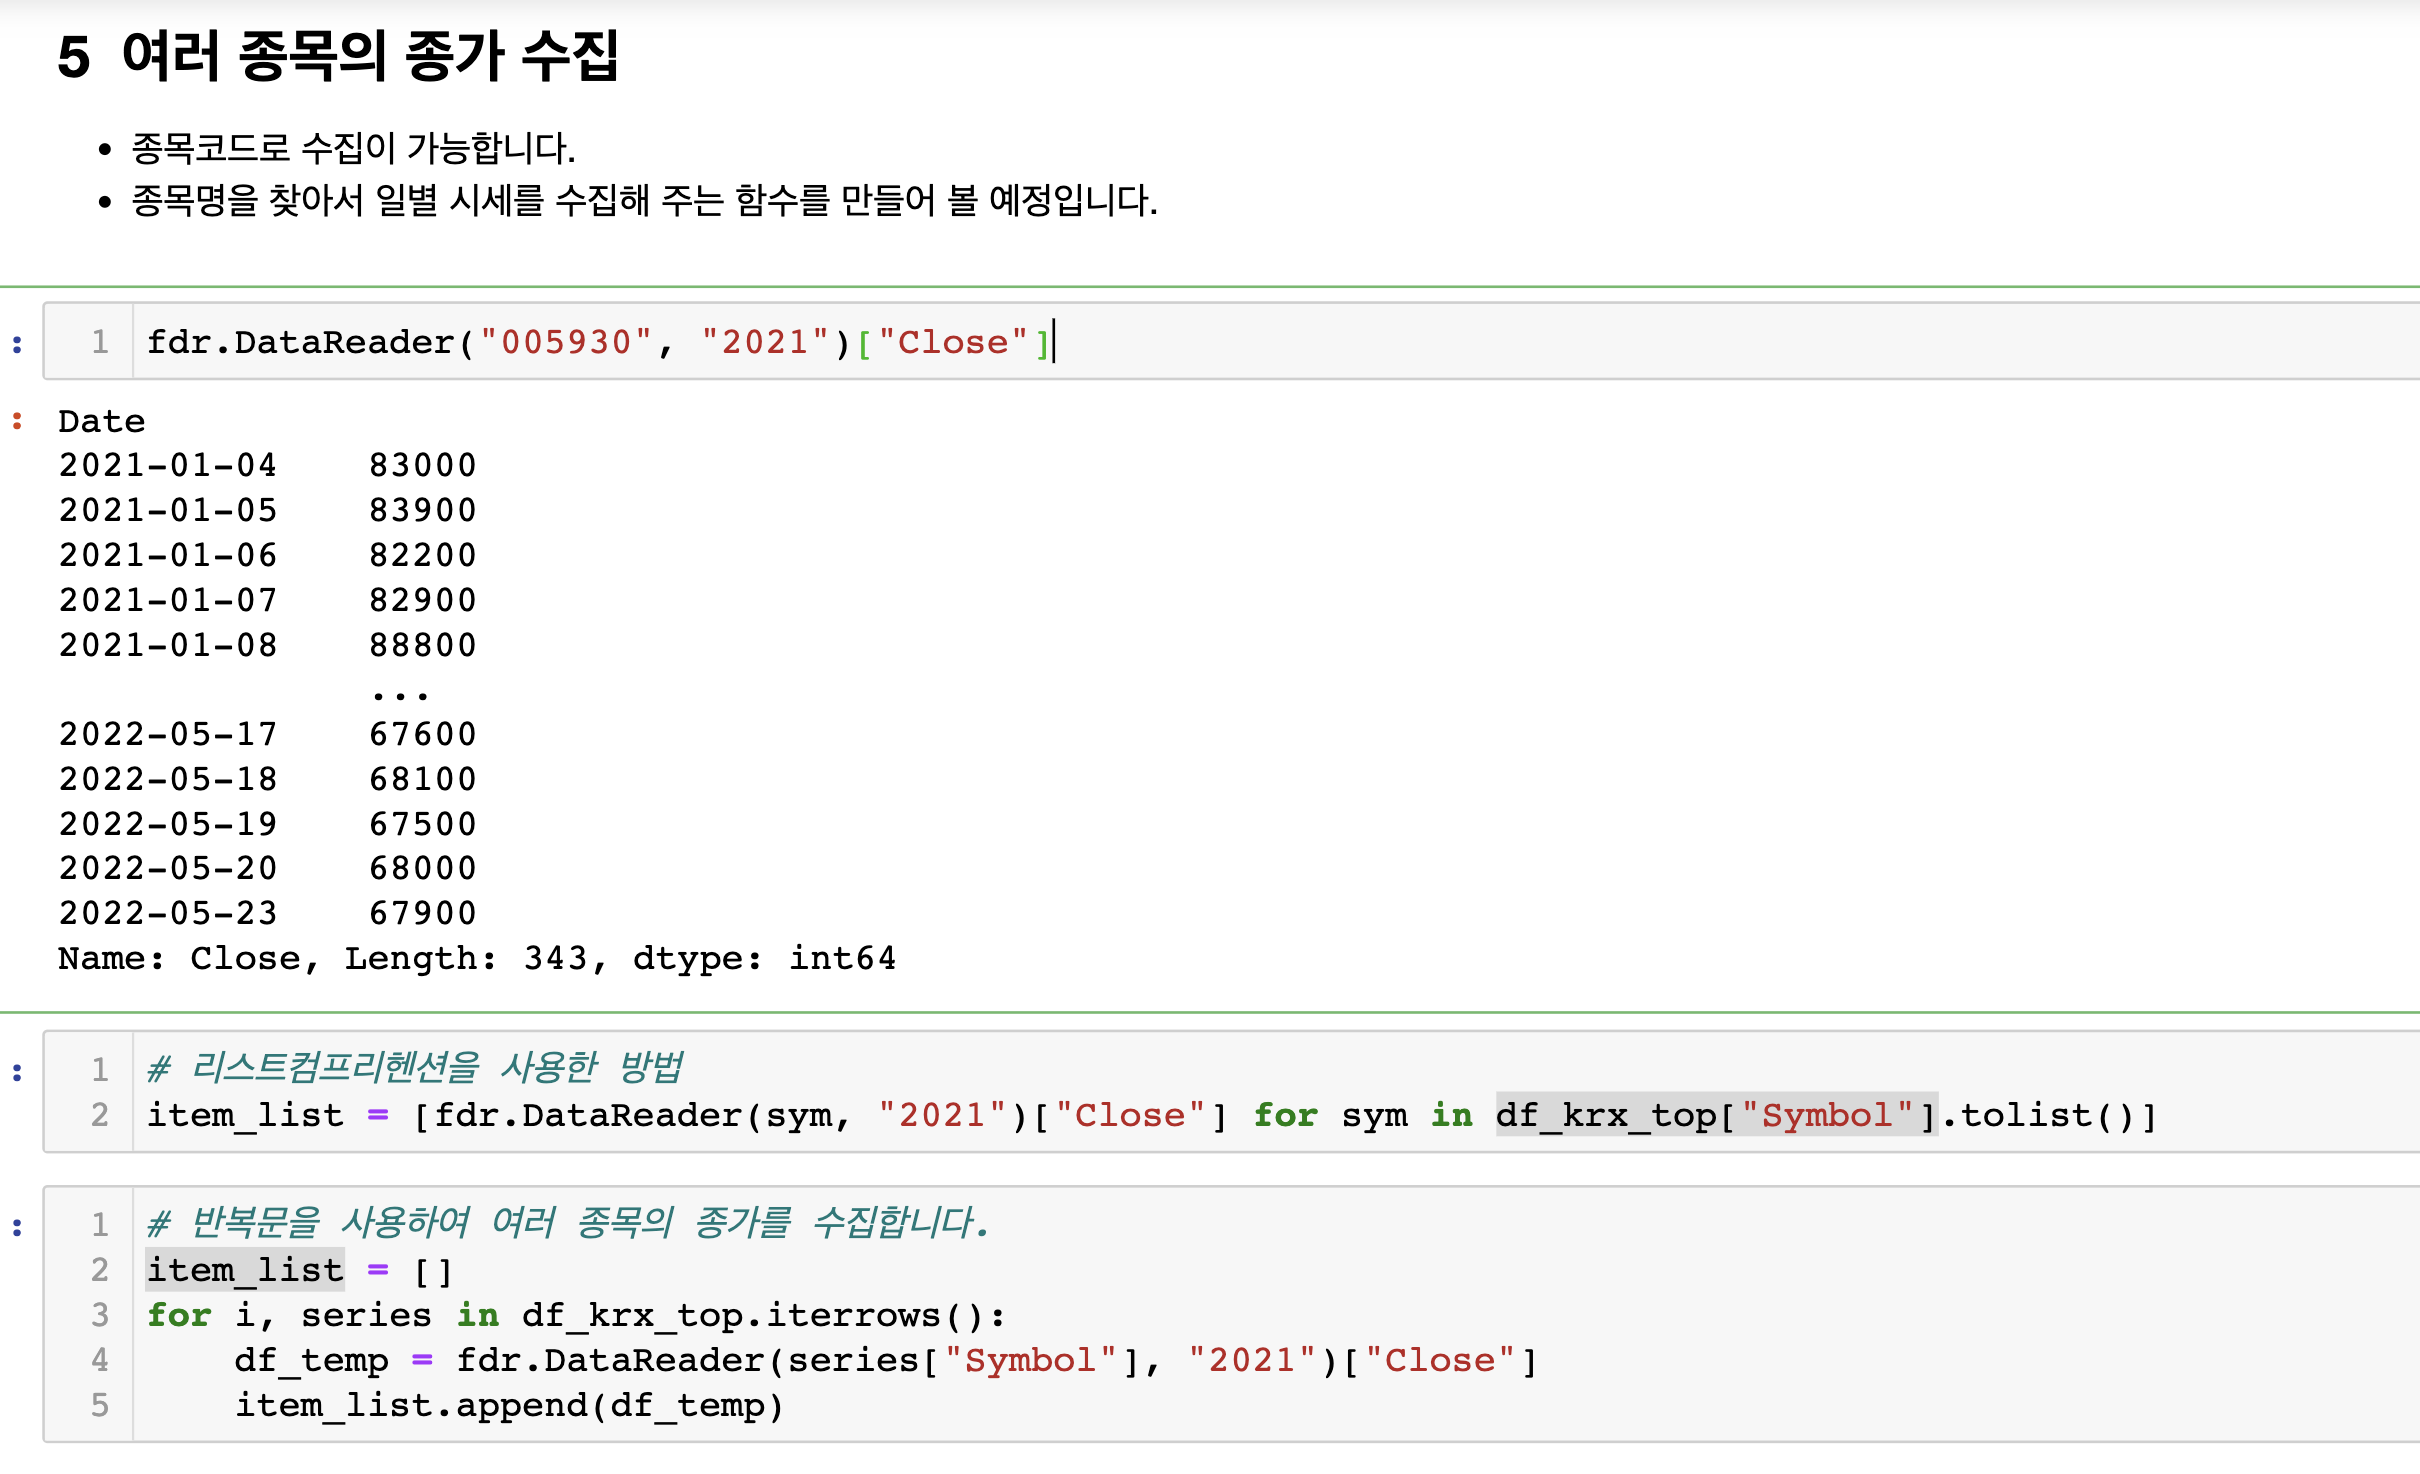

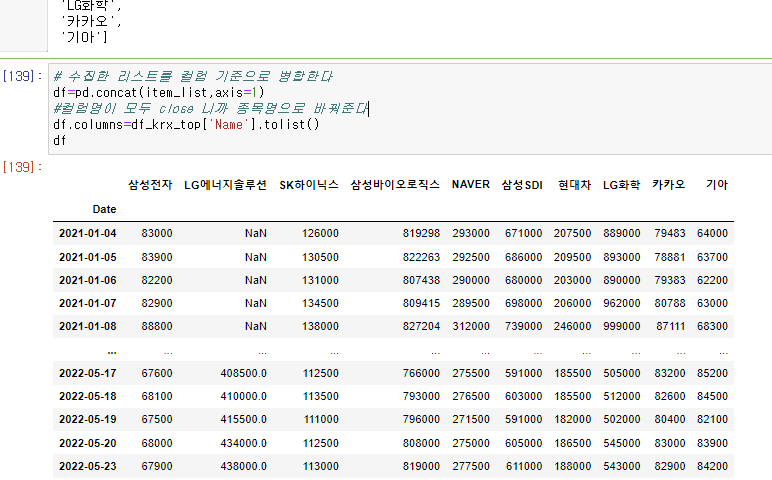

In [15]:
top_table.columns = ["Name"]

In [19]:
df_krx_top = top_table.merge(df_krx, how="left")
df_krx_top.T

,Name,Symbol
0,삼성전자,005930
1,LG에너지솔루션,373220
2,SK하이닉스,000660
3,삼성바이오로직스,207940
4,NAVER,035420
5,삼성SDI,006400
6,현대차,005380
7,LG화학,051910
8,카카오,035720
9,기아,000270


In [22]:
df_krx_top.T

,0,1,2,3,4,5,6,7,8,9
Name,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,LG화학,카카오,기아
Symbol,005930,373220,000660,207940,035420,006400,005380,051910,035720,000270


In [23]:
df_krx_top.T.merge(df["Close"])

KeyError: 'Close'

In [21]:
fdr.DataReader("005930","2021")["Close"]

Date
2021-01-04    83000
2021-01-05    83900
2021-01-06    82200
2021-01-07    82900
2021-01-08    88800
              ...  
2022-05-17    67600
2022-05-18    68100
2022-05-19    67500
2022-05-20    68000
2022-05-23    68000
Name: Close, Length: 343, dtype: int64

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [ ]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
# item_list = []


### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [ ]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.



### 시각화를 위한 폰트 설정

In [ ]:
import platform

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [ ]:
# 시각화를 위한 폰트설정

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당

# 폰트설정

# 마이너스폰트 설정

# 그래프 스타일 설정


In [ ]:
# 한글폰트 확인


## 여러 종목 한번에 시각화 하기

In [ ]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화


In [ ]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.


## 2축 그래프 사용하기

In [ ]:
# secondary_y를 사용해 2축 그래프 그리기


## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [ ]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.


In [ ]:
# 수익률 시각화 하기


## pyplot의 subplots 로 서브플롯 그리기

In [ ]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.



In [ ]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.


## 전체 데이터프레임 값에 대한 수익률 계산하기

In [ ]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.


### 전체 종목의 수익률 시각화

In [ ]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.


In [ ]:
# 계산된 수익률에 대한 기술통계값 구하기


In [ ]:
# 수익률에 대한 히스토그램 그리기


## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [ ]:
# skew 로 수익률의 왜도를 구합니다.


### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)



* [scipy.stats.kurtosis — SciPy Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)
* Fisher의 정의를 사용하면 결과에서 3.0을 빼서 정규 분포에 대해 0.0이 됩니다.
* True 이면 피셔의 정의가 사용됩니다(정상 ==> 0.0). False이면 Pearson의 정의가 사용됩니다(정상 ==> 3.0)

In [ ]:
# kurt 로 첨도를 구합니다.
